In [1]:
import requests
import datetime
import time
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from api.GlassnodeAPI import GlassnodeAPI
from api.CoinGeckoAPI import CoinGeckoAPI
from metrics.cap_metrics import *
from visualization.line_graph import *

In [2]:
glassnode_api_key = open("/home/malimi/Skillset/glassnode_api_key.txt",'r').read()[:-1]

In [3]:
g = GlassnodeAPI(key=glassnode_api_key, time_out=10)

In [4]:
a = g.get_price_realized_price()
a

,time,price,realized price
0,2010-07-17 02:00:00,0.049510,0.049510
1,2010-07-18 02:00:00,0.085840,0.049636
2,2010-07-19 02:00:00,0.080800,0.050030
3,2010-07-20 02:00:00,0.074733,0.050163
4,2010-07-21 02:00:00,0.079210,0.050260
...,...,...,...
3852,2021-02-01 01:00:00,33543.859744,11945.138601
3853,2021-02-02 01:00:00,35524.119952,11999.467109
3854,2021-02-03 01:00:00,37451.367473,12052.611823
3855,2021-02-04 01:00:00,36924.742006,12133.419869


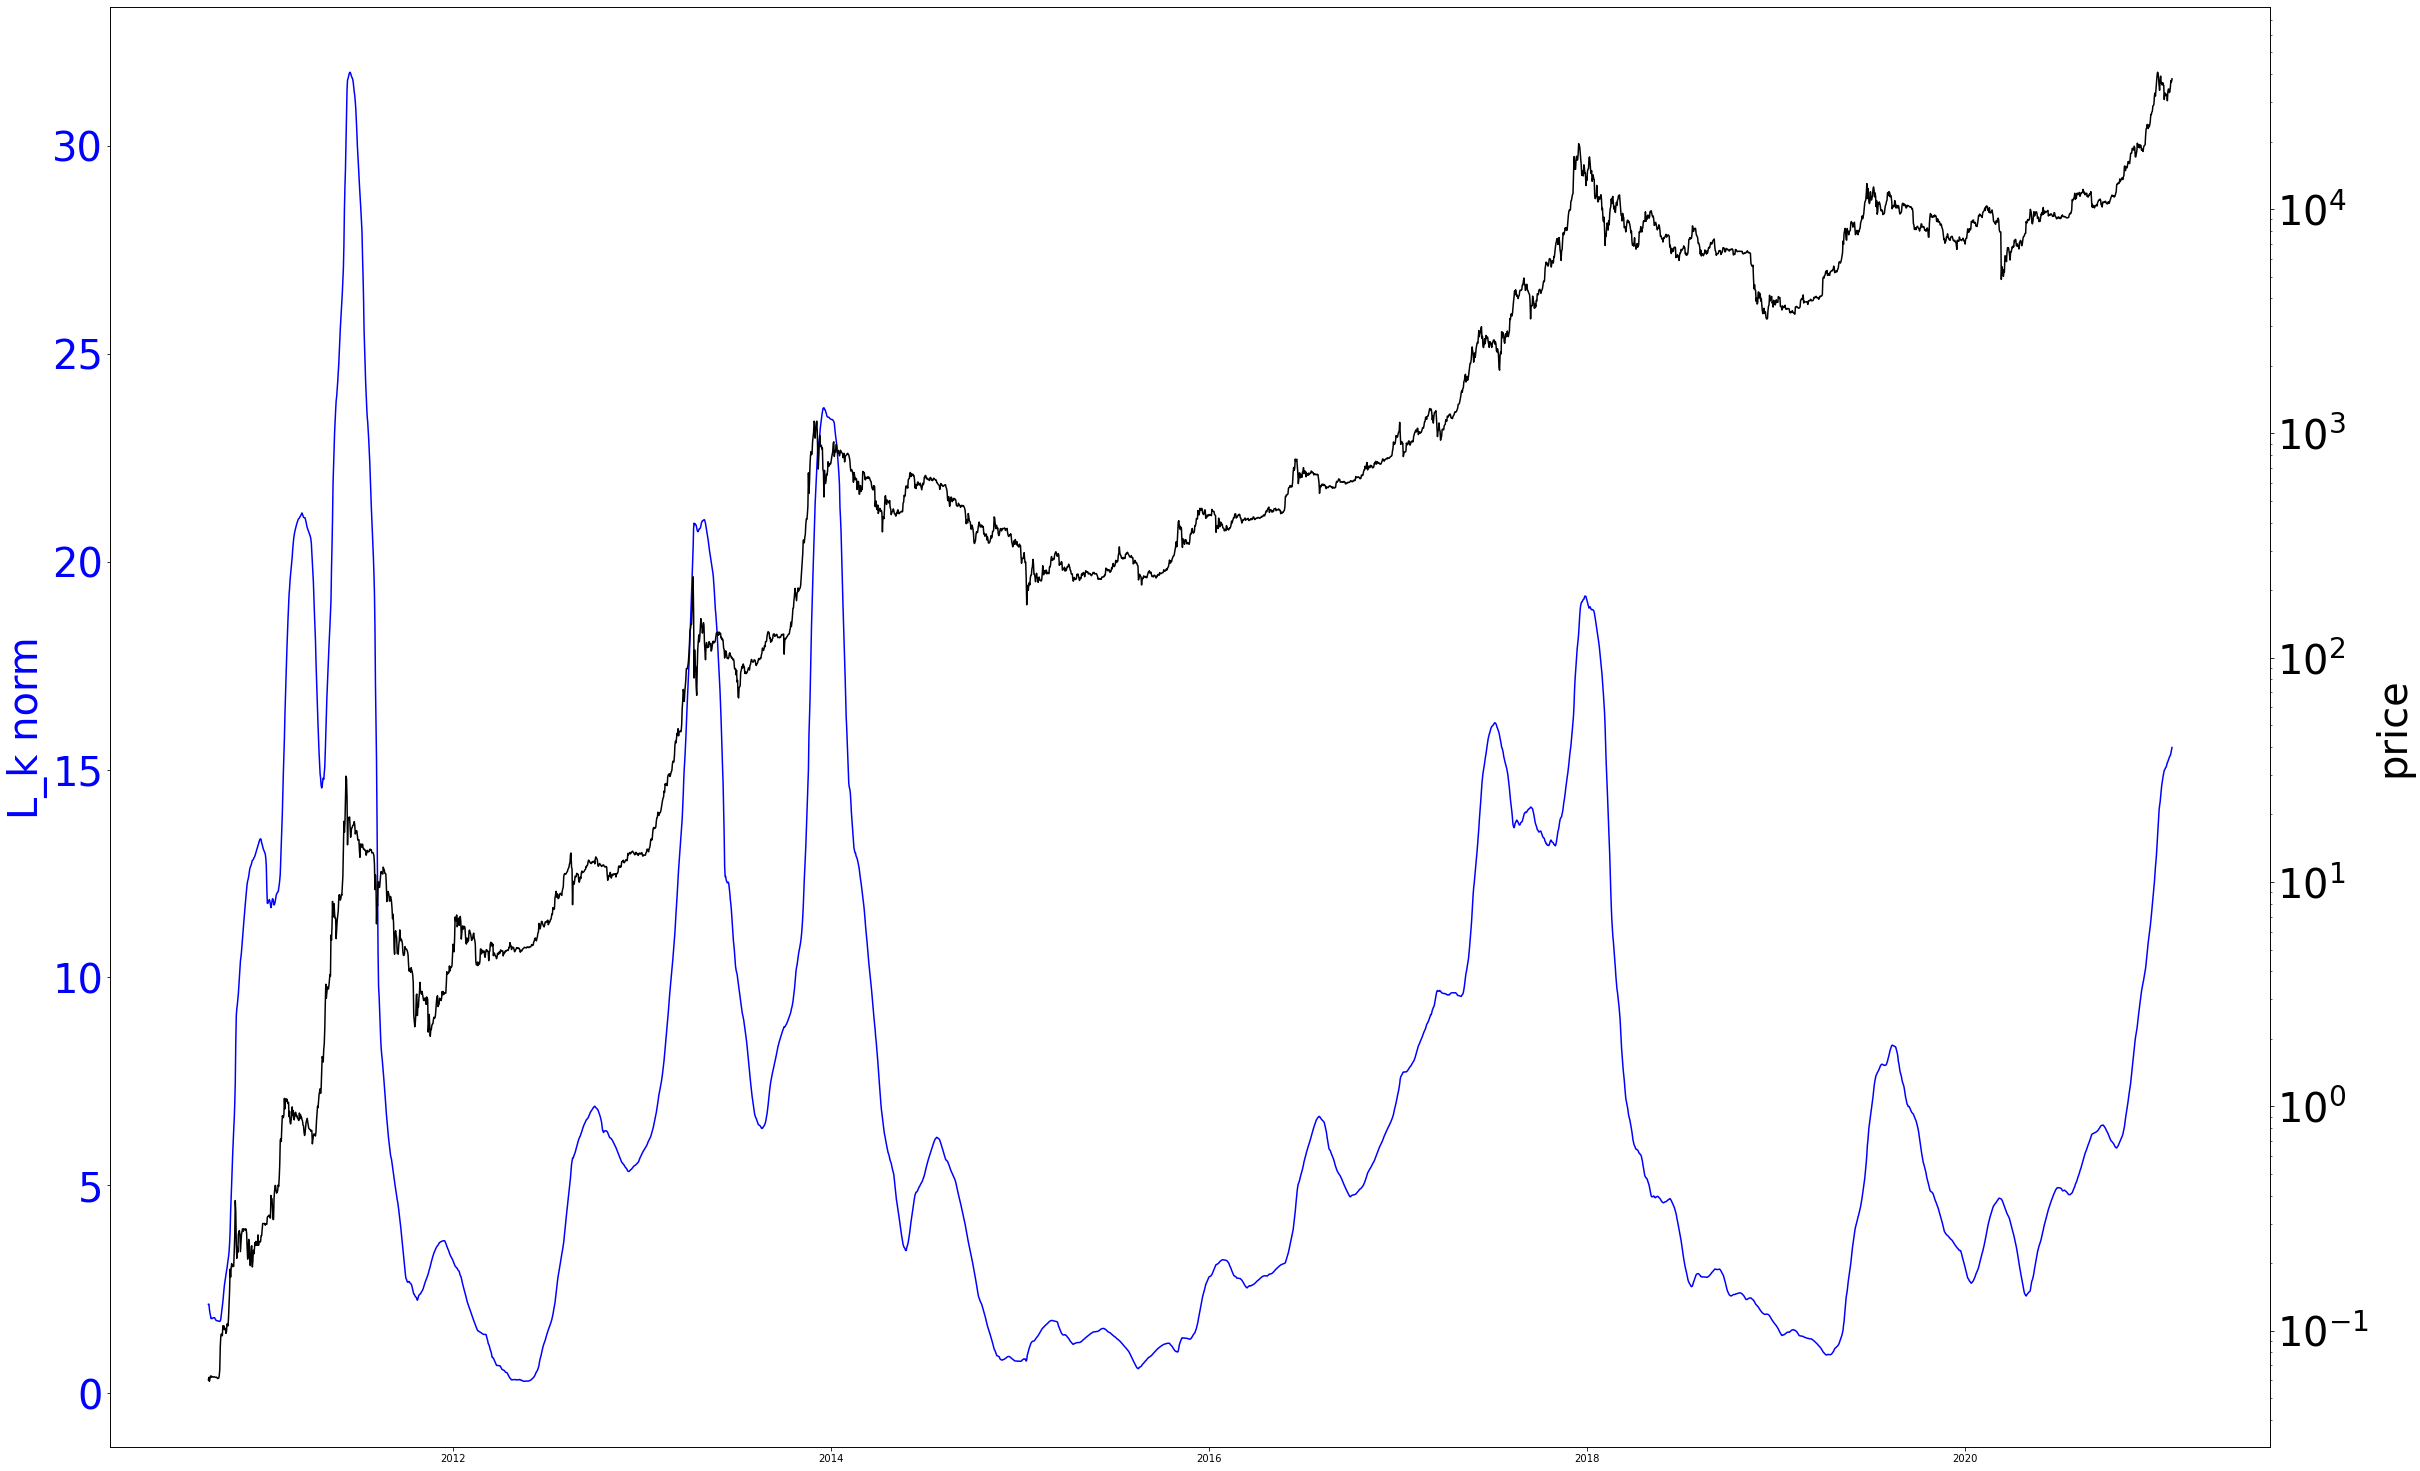

In [5]:
step = 60
m = moving_L_k_norm(a['price'],a['realized price'],2,step)
fig, ax1, ax2 = with_price_in_background(a['time'][step:],a['price'][step:])
ax1.set_ylabel('L_k norm',color='blue', fontsize=40)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=40)
ax1.plot(a['time'][step:],m,color='blue')
plt.show()

In [3]:
date_time_from = datetime.datetime(year=2013, month=5,day=1)
date_time_to = datetime.datetime(year=2022, month = 2, day = 7)

In [4]:
y = CoinGeckoAPI().get_closing_prices(date_time_from,date_time_to,'day')

In [5]:
y

,date,price
0,2013-05-01 02:00:00,117.000000
1,2013-05-02 02:00:00,103.430000
2,2013-05-03 02:00:00,91.010000
3,2013-05-04 02:00:00,111.250000
4,2013-05-05 02:00:00,116.790000
...,...,...
3195,2022-02-02 01:00:00,38835.694943
3196,2022-02-03 01:00:00,37000.982499
3197,2022-02-04 01:00:00,37101.351594
3198,2022-02-05 01:00:00,41673.839554


In [6]:
import matplotlib.pyplot as plt
import numpy as np

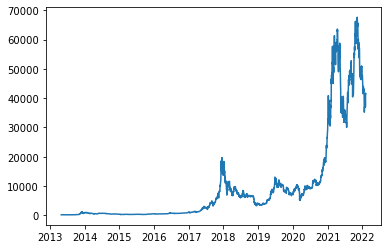

In [7]:
plt.plot(y['date'],y['price']);